# Spam Email Classification: A Practical Approach to Binary Classification

Email is one of the most widely used communication tools today, but it is also a common target for unsolicited and harmful messages. Detecting spam emails is an essential task to enhance privacy and improve user experience. This project focuses on classifying emails as either spam or legitimate (ham) using a combined dataset derived from two renowned sources: the **2007 TREC Public Spam Corpus** and the **Enron-Spam Dataset**.

### About the Dataset

The dataset used in this project consists of **83,446 email records** labeled as either:
- **Spam (`1`)**: Unsolicited or harmful messages.
- **Ham (`0`)**: Legitimate email content.

Each record includes:
1. **Label**: Indicates whether the email is spam or not.
2. **Text**: The actual content of the email.

### Data Sources

The dataset combines information from:
- [2007 TREC Public Spam Corpus](https://plg.uwaterloo.ca/~gvcormac/treccorpus07/)  
  Preprocessed dataset: [Download here](https://www.kaggle.com/datasets/bayes2003/emails-for-spam-or-ham-classification-trec-2007)
- [Enron-Spam Dataset](https://www2.aueb.gr/users/ion/data/enron-spam/)  
  Preprocessed dataset: [Download here](https://github.com/MWiechmann/enron_spam_data/)

The combination and preprocessing of these datasets were accomplished using a custom script available [here](https://github.com/PuruSinghvi/Spam-Email-Classifier/blob/main/Combining%20Datasets.ipynb).

### Objective and Inspiration

This project tackles a **binary classification problem** where the goal is to differentiate between spam and ham emails. The task involves understanding the nuances of email content and leveraging machine learning models to achieve high classification accuracy. The approach draws inspiration from Ramya Vidiyala’s article, ["Detecting Spam in Emails"](https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48), which highlights effective methodologies for spam detection.

By identifying spam emails with high accuracy, this project aims to demonstrate the potential of machine learning in solving real-world challenges, such as improving email security and reducing unwanted communications.


# Data Preprocessing

To prepare the dataset for spam email classification, the following libraries and tools are imported:  

- **NumPy**: For numerical operations.  
- **Pandas**: For data manipulation and handling CSV files.  
- **NLTK (Natural Language Toolkit)**: For natural language processing tasks, including tokenization and stopword removal.  
- **Regular Expressions (`re`)**: For text cleaning and pattern matching.  

Additionally, necessary NLTK resources such as stopwords and tokenizers are downloaded to enable effective text processing.


In [15]:
# Data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Visualization

For exploring and visualizing the dataset, the following libraries and tools are utilized:  

- **Matplotlib**: For creating static, animated, and interactive visualizations.  
- **Collections (Counter)**: For counting occurrences of elements in the dataset, such as word frequencies.  
- **WordCloud**: For generating word cloud representations to visualize common terms in the dataset.

In [16]:
# Visualization
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Feature Engineering

To transform the dataset into a format suitable for machine learning models, the following libraries and tools are employed:  

- **String**: For handling string operations and text processing.  
- **Regular Expressions (`re`)**: For pattern matching and text cleaning.  
- **Keras Preprocessing**:  
  - **Tokenizer**: For converting text into sequences of tokens.  
  - **Pad Sequences**: For ensuring uniform input length by padding or truncating sequences.  
- **Scikit-learn Preprocessing**:  
  - **LabelEncoder**: For encoding target labels (spam or ham) into numerical format.  

In [7]:
# Feature Engineering
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Machine Learning Model

The following libraries and tools are used to build, train, and evaluate the machine learning model:  

- **Scikit-learn**:  
  - **Train-Test Split**: For dividing the dataset into training and testing sets.  

- **Keras**:  
  - **Sequential**: For creating a linear stack of layers for the model.  
  - **Layers**:  
    - **Dense**: Fully connected layers for learning complex representations.  
    - **LSTM**: Long Short-Term Memory layers for capturing sequential patterns in text data.  
    - **Embedding**: For converting words into dense vector representations.  
    - **Dropout**: For regularization to reduce overfitting.  
    - **Activation**: For applying activation functions like ReLU or softmax.  
    - **Bidirectional**: For processing sequences in both forward and backward directions.  

- **TensorFlow**:  
  - As the backend for training and deploying the neural network model.

In [5]:
# Machine Learning Model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Bidirectional
import tensorflow as tf

# Evaluation Metric

To assess the performance of the machine learning model, the following libraries and tools are used:  

- **Scikit-learn Metrics**:  
  - **Confusion Matrix**: For visualizing true positives, true negatives, false positives, and false negatives.  
  - **F1 Score**: For evaluating the balance between precision and recall.  
  - **Precision Score**: For measuring the proportion of correctly identified positive instances.  
  - **Recall Score**: For measuring the proportion of actual positives correctly identified.  

- **Seaborn**:  
  - For creating visually appealing and informative plots, such as heatmaps for the confusion matrix.  

In [8]:
# Evaluation Metric
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns

# Load the Dataset

The dataset is loaded into a DataFrame for further analysis. In this dataset:

- **`1`** indicates that the email is classified as **spam**.
- **`0`** denotes that the email is **legitimate (ham)**.

A preview of the first few records provides an overview of the data structure and content.

In [9]:
# Load the dataset
df = pd.read_csv("combined_data.csv")
df.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


## Check for Missing Values

To ensure the dataset is complete and ready for analysis, we check for any missing values. This step helps identify if there are any gaps in the data that need to be handled before model training.

In [10]:
print(df.isnull().sum())

label    0
text     0
dtype: int64


## Check the Shape of the Data

The shape of the dataset is examined to understand its structure, including the number of records (rows) and features (columns). This provides an overview of the dataset's size before processing.

In [11]:
df.shape

(83448, 2)

## Convert Text to Lowercase

To standardize the text data, all email content is converted to lowercase. This step helps ensure that words with different cases (e.g., "Spam" and "spam") are treated as the same during analysis.


In [12]:
df['text'] = df['text'].str.lower()

## Remove Numbers and Special Characters

Special characters, symbols, and numbers are often irrelevant for distinguishing between spam and legitimate emails. Therefore, these elements are removed to clean the text data and focus on meaningful words.

In [13]:
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(remove_special_characters)

## Remove English Stop-Words

Common words such as "the", "a", and "of" (known as stop-words) are removed from the text since they do not add significant meaning for spam classification. By eliminating these words, we can focus on the more informative content of the emails.

In [17]:
# Define stop-words in English
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

# Tokenize the text
df['text'] = df['text'].apply(word_tokenize)

# Remove stop words
df['text'] = df['text'].apply(remove_stop_words)

# Rejoin words for EDA
df['text'] = df['text'].apply(' '.join)

## Removal of Hyperlinks

Hyperlinks (URLs) present in emails are removed, as they generally do not contribute useful information for spam classification. This step helps clean the text and focus on the actual content of the emails.

In [18]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['text'] = df['text'].apply(remove_hyperlink)

# Exploratory Data Analysis

To gain insights into the dataset, we perform an initial exploration by reviewing a few examples of spam emails. This helps us understand the content and structure of spam messages, providing context for the classification task.

In [19]:
for i in range (1,3):
    print("Email #"+str(i))
    spam_email = df[df['label'] == 1]['text'].iloc[i]
    print(spam_email+"\n")

Email #1
wulvob get medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt ever stopped wonder much average man pays mediecines ap painkillers drugs improve quality life weight reducing tablets many escapenumber whats worse mediucine costs lot branded rfwur intrested http dmvrwm remunerativ net dfuaeirxygiq visit website escapenumber

Email #2
university degree obtain prosperous future money earning power prestige comes career position youve always dreamed diploma prestigious non accredited unversities based present knowledge professional experience qualify required tests classes books examinations con

# Reasons for Spam Email Classification

### Email 1: Medication Advertisements
- **Unsolicited Promotion**: This email promotes pharmaceutical products like Viagra and Cialis, a common trait of spam emails.
- **Incoherent Text**: It includes a mix of unrelated words and drug names, which is often used in spam to evade detection.
- **Suspicious URLs**: The email includes a link to a website for purchasing drugs, which is typical of spam emails aiming to direct users to unreliable sources.
- **Irregular Formatting**: The use of random characters and inconsistent spaces is a tactic often seen in spam to bypass filters.
- **Generic Content**: There is no personalization in the message, indicating it was sent to many recipients rather than being tailored to one individual.

### Email 2: Offering Degrees
- **Unrealistic Claims**: The email promises a degree without exams, assignments, or books, which is a clear sign of a scam.
- **Lack of Credibility**: There are no references to legitimate institutions or any specific details about the degree.
- **24/7 Availability**: Claims of being available all the time are suspicious, as they don't align with legitimate educational programs.
- **Vague Information**: The message lacks concrete details, further indicating it is likely spam.

### Key Characteristics of Spam Emails:
- **Unsolicited Offers**: Often push products or services without the recipient's consent.
- **Unusual or Random Language**: Spam emails often use jumbled words or phrases to avoid detection.
- **Too-Good-to-Be-True Promises**: These emails commonly include offers that are unrealistic or improbable, like instant degrees or medications.
- **Impersonal Content**: Generic emails that are not directed to a specific recipient often signal spam.
- **Suspicious Links**: These emails tend to contain links that lead to phishing sites or scams.
- **Disorganized and Unfocused**: The content is often incoherent and lacks clear structure or purpose.

## Exploring Legitimate Email Examples

To further understand the characteristics of legitimate emails, we review a few examples from the dataset. This helps distinguish the differences between spam and legitimate content.


In [20]:
for i in range (1,3):
    print("Email #"+str(i))
    legitimate_email = df[df['label'] == 0]['text'].iloc[i]
    print(legitimate_email+"\n")

Email #1
thanks answers guys know checked rsync manual would rather get escapenumber sure answer one current script bin bash rsync avt exclude alpha exclude arm exclude hppa exclude hurd exclude iaescapenumber exclude mescapenumberk exclude mips exclude mipsel exclude multi arch exclude powerpc exclude sescapenumber exclude sh exclude sparc exclude source ftp de debian org debian cd var www mirror debian cd know loads excludes include distros soon rsync manual del alias delete delete delete extraneous files dest dirs delete receiver deletes transfer default delete receiver deletes xfer delete receiver deletes transfer delete excluded also delete excluded files dest dirs delete would suggest use thanks john escapelong escapenumber escapenumber escapenumber olleg samoylov wrote jonathan escapelong wrote sorry banal question favourite keys escapenumber stage rsync rsync verbose recursive links hard links times filter r tmp delete delay updates source url destination log file olleg samoylo

# Why These Emails Are Classified as Legitimate

### Email 1: Technical Discussion
- **Relevant and Detailed Content**: The email provides in-depth, technical information about using rsync, demonstrating a focused and purposeful conversation.
- **Personalized Communication**: The email references prior messages and specific individuals, indicating it is targeted and relevant to the recipients.
- **Professional Tone**: The language is formal, technical, and appropriate for the subject matter, typical of legitimate communication.
- **Absence of Unsolicited Offers**: There are no unsolicited promotions or suspicious links, which are often seen in spam.

### Email 2: Legitimate Promotion
- **Recognized Source**: The email is from CNN, a reputable media outlet, promoting a scheduled event, which is standard practice for well-known organizations.
- **Clear and Relevant Information**: The email shares specific details about the event (an interview with Michael Moore), confirming its legitimacy.
- **Opt-in Confirmation**: The message mentions that the recipient has subscribed to receive such communications, a key indicator of a legitimate email.
- **Unsubscribe Option**: The presence of a clear option to unsubscribe ensures compliance with legitimate marketing standards.

### Key Characteristics of Legitimate Emails:
- **Relevant and Specific Content**: Legitimate emails often contain detailed, contextual information tailored to the recipient's interests or needs.
- **Personalized Communication**: These emails usually address the recipient directly or reference prior conversations, indicating a targeted approach.
- **Professional Language**: They maintain a professional tone, with coherent, purposeful content aligned to the subject matter.
- **Affiliation with Recognized Entities**: Legitimate emails often come from trusted organizations, adding credibility to the communication.
- **Clear Opt-in and Unsubscribe Options**: Legitimate marketing emails provide recipients with the option to opt-in or unsubscribe, adhering to email marketing regulations.
- **No Suspicious Links or Offers**: Unlike spam, they do not contain unsolicited offers, misleading links, or requests for sensitive information.

## Spam vs. Legitimate Email Distribution

A pie chart is used to visualize the distribution of spam and legitimate emails in the dataset.

The chart reveals that approximately **52.6%** of the emails are classified as spam, while **47.4%** are legitimate. This nearly balanced distribution is beneficial for training machine learning models, as it reduces the risk of bias towards either class, ensuring a more accurate and fair model.

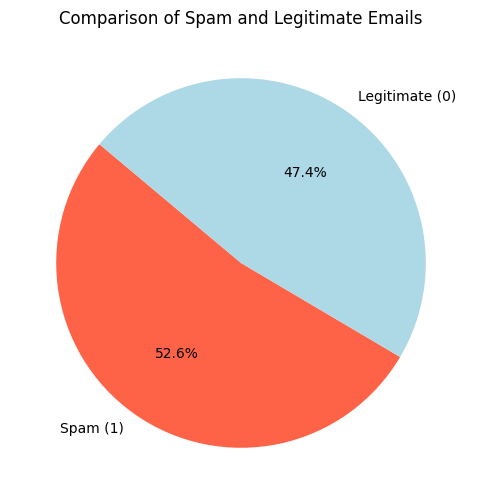

In [21]:
# Count the number of spam and legitimate emails
email_counts = df['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(email_counts, labels=['Spam (1)', 'Legitimate (0)'], autopct='%1.1f%%', startangle=140, colors=['tomato', 'lightblue'])
plt.title('Comparison of Spam and Legitimate Emails')
plt.show()

## Word Frequency Analysis

A bar chart is created to compare the most frequent words found in both spam and legitimate emails. This analysis helps identify key terms that are commonly associated with each type of email.

By separating the spam and legitimate emails and counting the word frequencies, we can observe differences in the language used. This can be a valuable feature for training classification models, as certain words or phrases may be indicative of spam or legitimate content.

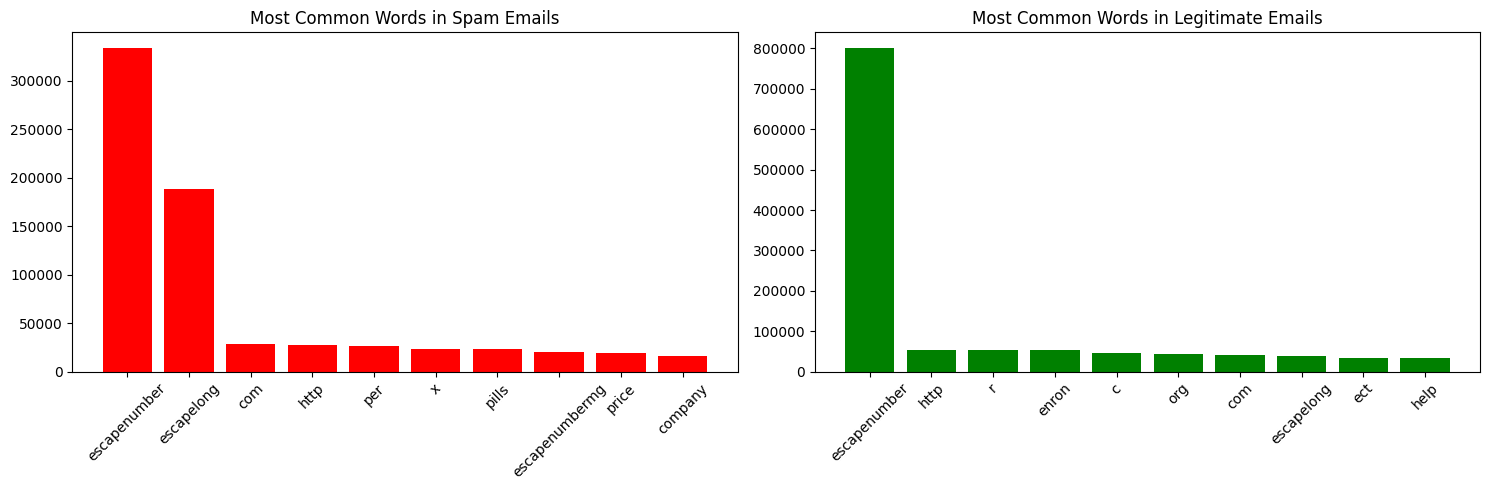

In [24]:
# Separate the spam and legitimate emails
spam_emails = df[df['label'] == 1]['text']
legit_emails = df[df['label'] == 0]['text']

# Count word frequencies for spam
spam_words = Counter()
spam_emails.apply(lambda x: spam_words.update(x.split()))

# Count word frequencies for legitimate emails
legit_words = Counter()
legit_emails.apply(lambda x: legit_words.update(x.split()))

# Get the most common words in spam and legitimate emails
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrame
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

# Plotting the most common words in spam emails
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='red')
plt.title('Most Common Words in Spam Emails')
plt.xticks(rotation=45)

# Plotting the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='green')
plt.title('Most Common Words in Legitimate Emails')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This comparison highlights the key differences in language use between spam and legitimate emails, providing insights into the vocabulary patterns that can help in distinguishing between the two types of messages.

## Word Cloud for Spam Emails

A word cloud is generated to visualize the most common words found in spam emails. This graphic representation highlights the frequency of words, with larger words appearing more often in the dataset. Word clouds provide an intuitive way to identify recurring themes or terms in spam emails.

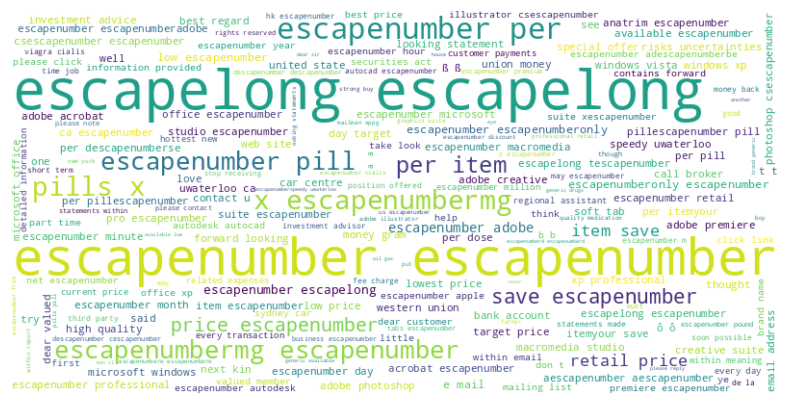

In [25]:
# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## N-gram Analysis

N-gram analysis is conducted to explore common sequences of two (bigrams) or more words in both spam and legitimate emails. By examining these sequences, we can better understand the frequent phrases and language patterns used in each type of email.

In this analysis, we focus on extracting and counting bigrams (two-word sequences) from the email text, providing insight into how certain word combinations are more common in spam emails compared to legitimate ones.


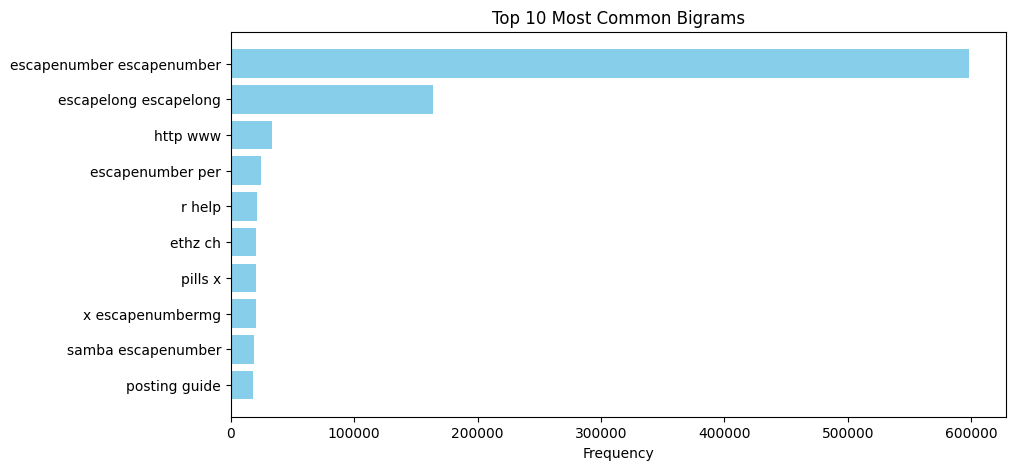

In [26]:
# Extract n-grams from text
def generate_ngrams(text, n=2):
    # Split the text into words
    words = text.split()
    # Ensure that there is no enough words
    if len(words) >= n:
        return [' '.join(grams) for grams in ngrams(words, n)]
    else:
        return []

# Convert bigrams
df['bigrams'] = df['text'].apply(lambda x: generate_ngrams(x, n=2))

# count the frequencies
bigram_counts = Counter([bigram for sublist in df['bigrams'] for bigram in sublist])

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)

# Convert to DataFrame for visualization
bigrams_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

# Plot the most common bigrams
plt.figure(figsize=(10, 5))
plt.barh(bigrams_df['Bigram'], bigrams_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Bigrams')
plt.gca().invert_yaxis()  # Display the highest count at the top
plt.show()